#Modules

In [2]:
# system packages
import os
import shutil
import sys

# data and numerical management packages
import pandas as pd
import numpy as np

# useful during debugging (progress bars)
from tqdm import tqdm
import nltk
import re
from functools import reduce
import nltk
from nltk.corpus import stopwords
# typing
from typing import List, Callable, Dict
#Plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Data preparation 

In [3]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


In [4]:
from urllib import request
import zipfile

# Config
print("Current work directory: {}".format(os.getcwd()))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"

dataset_path = os.path.join(dataset_folder, "dependency_treebank.zip")

print(dataset_path)

def download_dataset(download_path: str, url: str):
    if not os.path.exists(download_path):
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")

def extract_dataset(download_path: str, extract_path: str):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path) as loaded_tar:
        loaded_tar.extractall(extract_path)
        print(loaded_tar)
    print("Extraction completed!")

# Download
download_dataset(dataset_path, url)

# Extraction
extract_dataset(dataset_path, dataset_folder)


Current work directory: /content
/content/Datasets/dependency_treebank.zip
Download complete!
Extracting dataset... (it may take a while...)
<zipfile.ZipFile filename='/content/Datasets/dependency_treebank.zip' mode='r'>
Extraction completed!


In [5]:
def splitting(i):
    if i <= 100:
        return 'train'
    elif i <= 150:
        return 'val'
    else:
        return 'test'

In [6]:

dataset_name = "dependency_treebank"
debug = True

folder = os.path.join(os.getcwd(), "Datasets", dataset_name)
files=os.listdir(folder)
files.sort()
dataframe_rows = {'train': [], 'val':[], 'test':[]}


for i, filename in enumerate(files):
  file_path = os.path.join(folder, filename)
  try:
        if os.path.isfile(file_path):
              # open the file
              list1, list2 = [], []
              with open(file_path, mode='r', encoding='utf-8') as text_file:
              # read it and extract informations
                # text = text_file.read()
                for line in text_file:
                    tokens = line.split("\t")[:2]
                    # print(tokens)
                    if len(tokens) == 2:
                          list1.append(tokens[0])
                          list2.append(tokens[1])
                    if tokens[0] == '.' and splitting(i) != 'test':
                          dataframe_rows[splitting(i)].append({"tokens": list1, "tags": list2})
                          #print(dataframe_rows[:6])
                          list1, list2 = [], []
                if splitting(i) == 'test':
                    dataframe_rows[splitting(i)].append({"tokens": list1, "tags": list2})
                    list1, list2 = [], []
  except Exception as e:
        print('Failed to process %s. Reason: %s' % (file_path, e))
        sys.exit(0)


df_train = pd.DataFrame(dataframe_rows['train'])
df_val = pd.DataFrame(dataframe_rows['val'])
df_test = pd.DataFrame(dataframe_rows['test'])


In [7]:
df_train['split']='train'
df_test['split']='test'
df_val['split']='val'

In [8]:
def getPercent(first, second):
   percent = first / second * 100
   return percent


In [9]:
df = pd.concat([df_train,df_test,df_val], ignore_index=True)
#df

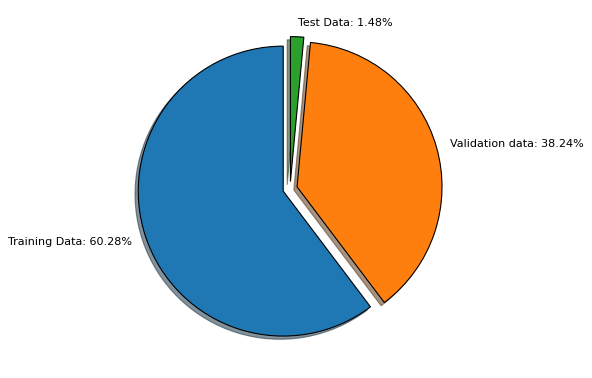

In [10]:
#Here I plot the distribution of Training, Validation and Test data
figure(figsize=(6, 6), dpi=80)
explode_ = (0.05, 0.05, 0.05)
l1=df.loc[df['split']=='train'].shape[0]
l2=df.loc[df['split']=='val'].shape[0]
l3=df.loc[df['split']=='test'].shape[0]
total=l1+l2+l3
y=np.array([l1, l2, l3])
mylabels=['Training Data: {}%'.format(round(getPercent(l1, total), 2)), 'Validation data: {}%'.format(round(getPercent(l2, total), 2)), 'Test Data: {}%'.format(round(getPercent(l3, total), 2))]
plt.pie(y, labels=mylabels, explode=explode_,startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth':1}, shadow=True)
plt.show()


#Functions

##Build vocabulary

In [11]:
from itertools import chain
from collections import Counter
from functools import reduce
from collections import OrderedDict, Counter
from operator import add


def build_vocabulary(words, special_tokens=[]):
    words = words.map(lambda s: Counter([w.lower().strip() for w in s]))
    #On the sequence words apply the function sum 
    count = reduce(add, words)
    w2i = {}
    i2w = {}
    
    for i,w in enumerate(chain(special_tokens, count)):
        w2i[w] = i
        i2w[i] = w
    return w2i, i2w

PAD, UNK, = '<pad>', '<unk>'
#<pad> all sequences should have same length. If the sequence is short then it will be padded
#<unk> means unknown token, used to replace rare word that didn't fir into the vocabulary
t2i_train, i2t = build_vocabulary(df.loc[df['split'] == 'train', 'tags'], [PAD, UNK])
w2i_train, _ = build_vocabulary(df.loc[df['split'] == 'train', 'tokens'])
print(t2i_train)
print(w2i_train)






{'<pad>': 0, '<unk>': 1, 'nnp': 2, ',': 3, 'cd': 4, 'nns': 5, 'jj': 6, 'md': 7, 'vb': 8, 'dt': 9, 'nn': 10, 'in': 11, '.': 12, 'vbz': 13, 'vbg': 14, 'cc': 15, 'vbd': 16, 'vbn': 17, 'rb': 18, 'to': 19, 'prp': 20, 'rbr': 21, 'wdt': 22, 'vbp': 23, 'rp': 24, 'prp$': 25, 'jjs': 26, 'pos': 27, '``': 28, 'ex': 29, "''": 30, 'wp': 31, ':': 32, 'jjr': 33, 'wrb': 34, '$': 35, 'nnps': 36, 'wp$': 37, '-lrb-': 38, '-rrb-': 39, 'pdt': 40, 'rbs': 41, 'fw': 42, 'uh': 43, 'sym': 44, 'ls': 45, '#': 46}
{'pierre': 0, 'vinken': 1, ',': 2, '61': 3, 'years': 4, 'old': 5, 'will': 6, 'join': 7, 'the': 8, 'board': 9, 'as': 10, 'a': 11, 'nonexecutive': 12, 'director': 13, 'nov.': 14, '29': 15, '.': 16, 'mr.': 17, 'is': 18, 'chairman': 19, 'of': 20, 'elsevier': 21, 'n.v.': 22, 'dutch': 23, 'publishing': 24, 'group': 25, 'rudolph': 26, 'agnew': 27, '55': 28, 'and': 29, 'former': 30, 'consolidated': 31, 'gold': 32, 'fields': 33, 'plc': 34, 'was': 35, 'named': 36, 'this': 37, 'british': 38, 'industrial': 39, 'congl

In [12]:
t2i_val, i2t_val = build_vocabulary(df.loc[df['split'] == 'val', 'tags'], [PAD, UNK])
#print(df.loc[df['split'] == 'train', 'tags'])
w2i_val, _ = build_vocabulary(df.loc[df['split'] == 'val', 'tokens'])

print(t2i_val)
print(w2i_val)

{'<pad>': 0, '<unk>': 1, 'nn': 2, 'vbz': 3, 'to': 4, 'nnp': 5, 'in': 6, 'nnps': 7, 'jjs': 8, 'dt': 9, 'pos': 10, 'jj': 11, 'nns': 12, 'vbp': 13, 'vb': 14, 'vbn': 15, 'cc': 16, '.': 17, 'ex': 18, 'wrb': 19, 'prp': 20, 'jjr': 21, 'rb': 22, 'vbg': 23, ',': 24, '``': 25, "''": 26, 'wp': 27, 'cd': 28, 'wdt': 29, 'md': 30, 'prp$': 31, 'vbd': 32, ':': 33, 'rp': 34, 'fw': 35, 'rbr': 36, 'uh': 37, '$': 38, 'wp$': 39, '-lrb-': 40, '-rrb-': 41, 'pdt': 42, 'rbs': 43, '#': 44, 'ls': 45}
{'beauty': 0, 'takes': 1, 'backseat': 2, 'to': 3, 'safety': 4, 'on': 5, 'bridges': 6, 'everyone': 7, 'agrees': 8, 'that': 9, 'most': 10, 'of': 11, 'the': 12, 'nation': 13, "'s": 14, 'old': 15, 'need': 16, 'be': 17, 'repaired': 18, 'or': 19, 'replaced': 20, '.': 21, 'but': 22, 'there': 23, 'disagreement': 24, 'over': 25, 'how': 26, 'do': 27, 'it': 28, 'highway': 29, 'officials': 30, 'insist': 31, 'ornamental': 32, 'railings': 33, 'older': 34, 'are': 35, "n't": 36, 'strong': 37, 'enough': 38, 'prevent': 39, 'vehicles'

In [13]:
t2i_test, i2t_test = build_vocabulary(df.loc[df['split'] == 'test', 'tags'], [PAD, UNK])
#print(df.loc[df['split'] == 'train', 'tags'])
w2i_test, _ = build_vocabulary(df.loc[df['split'] == 'test', 'tokens'])

print(t2i_test)
print(w2i_test)

{'<pad>': 0, '<unk>': 1, 'nnp': 2, 'cc': 3, 'vbd': 4, 'prp': 5, 'prp$': 6, '$': 7, 'jj': 8, 'nn': 9, 'in': 10, 'cd': 11, '.': 12, 'dt': 13, ',': 14, 'vbn': 15, 'vbz': 16, 'rb': 17, 'to': 18, 'vb': 19, 'wdt': 20, 'pos': 21, 'nns': 22, 'vbp': 23, 'md': 24, 'vbg': 25, 'jjr': 26, 'jjs': 27, 'rp': 28, ':': 29, 'nnps': 30, '``': 31, "''": 32, 'rbr': 33, 'ex': 34, 'rbs': 35, 'wp': 36, 'wrb': 37, '-lrb-': 38, '-rrb-': 39, 'wp$': 40, 'pdt': 41}
{'dow': 0, 'jones': 1, '&': 2, 'co.': 3, 'said': 4, 'it': 5, 'extended': 6, 'its': 7, '$': 8, '18-a-share': 9, 'offer': 10, 'for': 11, 'telerate': 12, 'inc.': 13, 'common': 14, 'stock': 15, 'until': 16, '5': 17, 'p.m.': 18, 'est': 19, 'nov.': 20, '9': 21, '.': 22, 'the': 23, ',': 24, 'valued': 25, 'at': 26, 'about': 27, '576': 28, 'million': 29, '33': 30, '%': 31, 'of': 32, 'that': 33, 'does': 34, "n't": 35, 'already': 36, 'own': 37, 'had': 38, 'been': 39, 'set': 40, 'to': 41, 'expire': 42, '6': 43, 'which': 44, 'owns': 45, '64': 46, "'s": 47, '95': 48, 

In [14]:
tokens_fd=nltk.probability.FreqDist(w2i_train)
list_l=list(tokens_fd.most_common())
# l=int(len(list_l)/3)
# list_l[:l]
min(list_l)[1]

5565

##Plot FreqDist

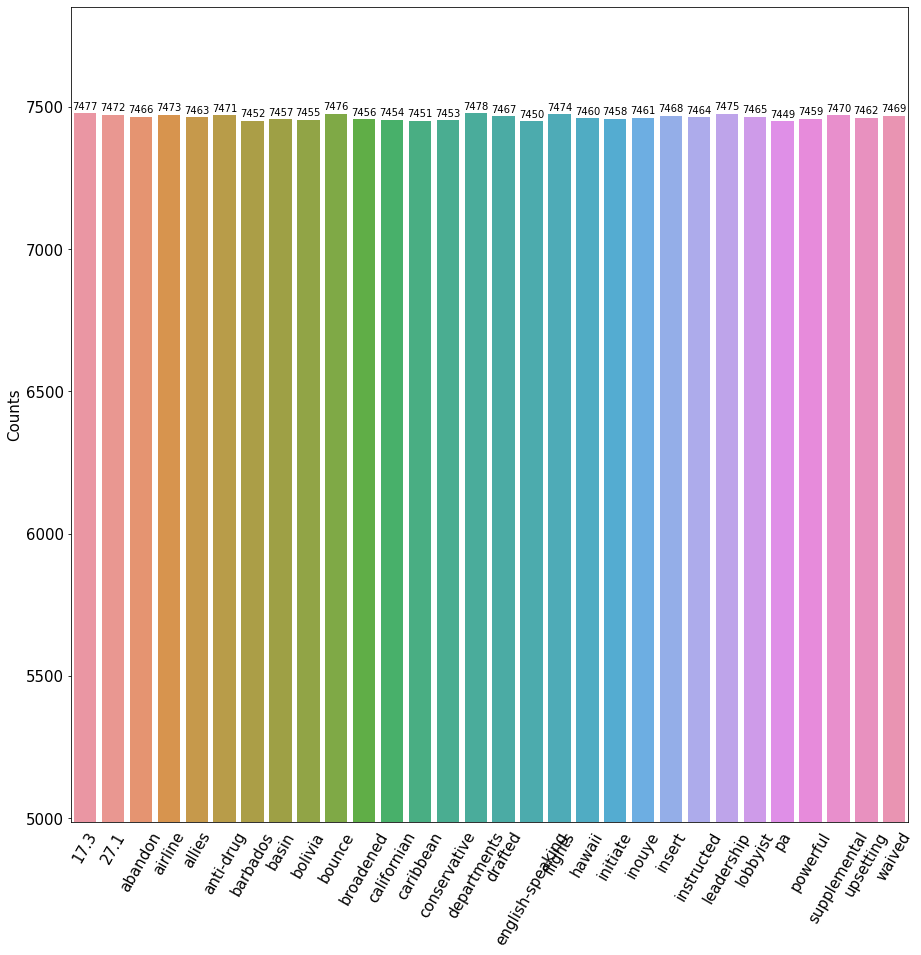

In [15]:
import seaborn as sns
tokens_fd=nltk.probability.FreqDist(w2i_train)

def plot_distribution(fd, N):
  keys=[i[0] for i in fd.most_common(N)]
  ord_keys=sorted(keys)
  values=[]
  for k in ord_keys:
    for i in fd.most_common(N):
      if i[0]==k:
        values.append(int(i[1]))
  
  plt.figure(figsize=(15, 15))
  ax=sns.barplot(x=ord_keys, y=values)
  for p in ax.patches:
    ax.annotate(format(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
  ax.grid(False)
  plt.xticks(fontsize=15, rotation=60)
  plt.ylabel('Counts', fontsize=15)
  plt.yticks(fontsize=15)

  list_values=[i[1] for i in fd.most_common()]
  y_min=min(list_values)+len(list_values)/1.5

  plt.ylim(y_min, None)
  ax.tick_params(bottom=False, left=True)
  for _,s in ax.spines.items():
      s.set_color('black')
  plt.show()

plot_distribution(tokens_fd, 30)

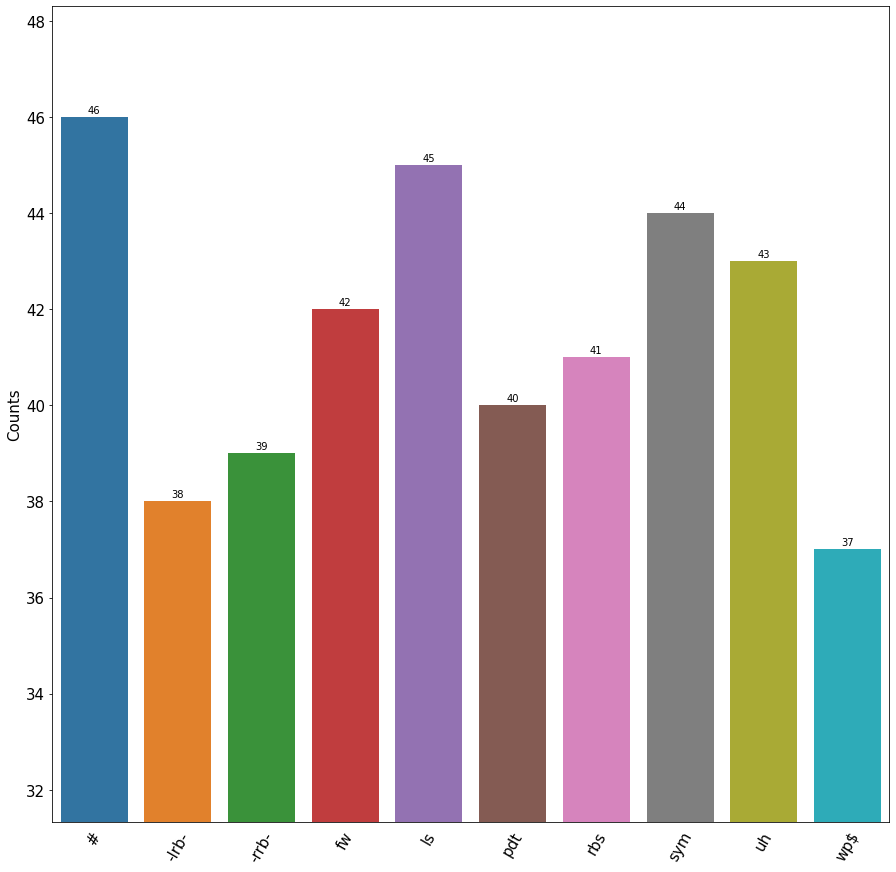

In [16]:
tags_fd=nltk.probability.FreqDist(t2i_train)
plot_distribution(tags_fd, 10)


##Load embedding

In [17]:
import gensim
import gensim.downloader as gloader


def load_embedding_model(model_type: str,
                         embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors:
    """
    Loads a pre-trained word embedding model via gensim library.
    :param model_type: name of the word embedding model to load.
    :param embedding_dimension: size of the embedding space to consider
    :return
        - pre-trained word embedding model (gensim KeyedVectors object)
    """

    download_path = ""

    # Find the correct embedding Model_Name
    if model_type.strip().lower() == 'glove':
        download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    else:
        raise AttributeError("Unsupported embedding model type! Available ones: word2vec, glove, fasttext")

    # Check download
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        raise e

    return emb_model


# Modify these variables as you wish!
# Glove -> 50, 100, 200, 300
embedding_model_type = "glove"
embedding_dimension = 50

        

##Check oov terms

In [18]:

def check_OOV_terms(old_voc, new_voc):
  voc = old_voc.copy()
  oov_terms=[]
  for i, word in enumerate(new_voc.keys()):
        if word not in old_voc.keys():
            oov_terms.append(word)
  return oov_terms



##Make the text categorical

In [19]:
def to_categorical(df, w2i, t2i):
    """Converts DataFrame words to categorical for use in the RNNs"""
    df['tokens'] = df['tokens'].map(lambda s: [w2i.get(w.lower().strip(), w2i[UNK]) for w in s])
    df['tags'] = df['tags'].map(lambda s: [t2i.get(w.lower().strip()) for w in s])

In [20]:
def embedd_OOV_terms(embedding_model, oov_terms, co_occurrence_matrix, w2i, i2w, rnd_OOV = False):
    """Embedd OOV words by weighted average of co-occurring neighbors."""
    for i, word in enumerate(oov_terms):
        if rnd_OOV:
            oov_vec = np.random.rand(embedding_dimension)
        else:
            oov_vec = np.zeros(embedding_dimension)
            for count_row in co_occurrence_matrix[w2i[word]]:
                weights_acc = 0
                for count, index in zip(count_row.data, count_row.indices):
                    if i2w[index] not in oov_terms:
                        weights_acc += count
                        oov_vec += count*embedding_model[i2w[index]]

            oov_vec/=weights_acc
        embedding_model.add(word, oov_vec)

    return embedding_model


##Combine old and new vocabulary function

In [21]:

def combine_vocabularies(old_voc, add_voc):
    """Merges vocabularies keeping consistent indices."""
    voc = old_voc.copy()
    count = 0
    
    for i, word in enumerate(add_voc.keys()):
        if word not in old_voc.keys():
            voc[word] = count + len(old_voc)
            count += 1
    return voc

#v1: tags
#v2: glove + train
#v3: glove + train + val
#v4: glove + train + val + test

##Co occurance matrix function

In [22]:
    """Builds word-word co-occurrence matrix based on word counts."""
import scipy
from tqdm import tqdm
import numpy as np

def co_occurrence_count(df, idx_to_word, window_size=1, sparse=True):
  vocab_count = len(idx_to_word)
  
  if sparse:
        co_occurrence_matrix = scipy.sparse.lil_matrix((len(idx_to_word), len(idx_to_word)), dtype=int)
  
  else:
        co_occurrence_matrix = np.zeros(shape=(vocab_count, vocab_count), dtype='float32')
  
  co_occurrence_matrix = scipy.sparse.lil_matrix((len(idx_to_word), len(idx_to_word)), dtype=int)
  for doc in tqdm(df["tokens"]):
        for i, token in enumerate(doc):
            window = doc[max(i-window_size, 0) : i+window_size+1]        
            for dd in window:
                    co_occurrence_matrix[token, dd] += 1
                
  co_occurrence_matrix[np.diag_indices(vocab_count)] = 0 # zeroes diag
    
  if sparse:
        return scipy.sparse.csr_matrix(co_occurrence_matrix)
  return co_occurrence_matrix

#Create embedding model

In [23]:
import numpy as np
# download pretrained GloVe embedding
embedding_dimension = 100 #@param [50, 100, 300] {type:"raw"}
print("Downloading Glove embedding with dimension:", embedding_dimension)
print("Be ",int(np.sqrt((embedding_dimension//50 - 1)))*"very ","patient :)",sep='')
embedding_model = load_embedding_model('glove',embedding_dimension)
#embedding_model = load_embedding_model(embedding_dimension)

# allows "PAD" to have index zero, crucial for consistency
PAD, UNK, = '<pad>', '<unk>'
pad_unk_vec = np.zeros((2, embedding_dimension)) # pad
pad_unk_vec[1] = np.random.rand(embedding_dimension) # unk

Be very patient :)
[==================================================] 100.0% 128.1/128.1MB downloaded


In [24]:
df_train=df.loc[df['split']=='train']
#df_train
df_val=df.loc[df['split']=='val']
#df_val
df_test=df.loc[df['split']=='test']
#df_test

#Building vocabulary

In [25]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn

##Build first vocabulary

In [26]:
# pos tag vocabulary
p2i, i2p = build_vocabulary(df_train['tags'], [PAD, UNK])

In [27]:
#Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 

voc1 = {e:i for i,e in enumerate(chain([PAD, UNK], embedding_model.vocab.keys()))}


##Build traning vocabulary

In [28]:
#Now let's build the training vocabulary
#Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1

w2i_train, i2w_train = build_vocabulary(df_train['tokens'])
voc2= combine_vocabularies(voc1, w2i_train)
oov1=check_OOV_terms(voc1, w2i_train)
percentage_oov1=getPercent(len(oov1), len(w2i_train))
#print(percentage_oov1)
print(f"Total of {len(oov1)} oov words: {percentage_oov1:.2}%")

Total of 362 oov words: 4.8%


In [29]:
to_categorical(df_train, voc2, t2i_train)

In [30]:
inv2 = {v:k for k,v in voc2.items()}
co_occ1 = co_occurrence_count(df_train, inv2, sparse=True)
emb=embedd_OOV_terms(embedding_model, oov1, co_occ1, voc2, inv2)
embedding_matrix_v2 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))
#print(embedding_matrix_v2)

100%|██████████| 1958/1958 [00:01<00:00, 1642.74it/s]


##Building Validation Vocabulary

In [31]:
w2i_val, _ = build_vocabulary(df_val['tokens'])
voc3= combine_vocabularies(voc2, w2i_val)
oov2=check_OOV_terms(voc2, w2i_val)
percentage_oov2=getPercent(len(oov2), len(w2i_val))
print(f"Total of {len(oov2)} oov words: {percentage_oov2:.2}%\n")
to_categorical(df_val, voc3, t2i_val)
inv3 = {v:k for k,v in voc3.items()}
co_occ2 = co_occurrence_count(df_val, inv3, sparse=True)
embeding_model = embedd_OOV_terms(embedding_model, oov2, co_occ2, voc3, inv3)
embedding_matrix_v3 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))


Total of 189 oov words: 3.5%



100%|██████████| 1242/1242 [00:00<00:00, 1667.97it/s]


##Build test vocabulary

In [32]:
w2i_test, _ = build_vocabulary(df_test['tokens'])
voc4= combine_vocabularies(voc3, w2i_test)
oov3=check_OOV_terms(voc3, w2i_test)
percentage_oov3=getPercent(len(oov3),len(w2i_test))
print(f"Found {len(oov3)} oov words: {percentage_oov3:.2}%")
to_categorical(df_test, voc4, t2i_val)
inv4 = {v:k for k,v in voc4.items()}
co_occ3 = co_occurrence_count(df_test, inv4, sparse=True)
embeding_model = embedd_OOV_terms(embedding_model, oov3, co_occ3, voc4, inv4)
embedding_matrix_v4 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))


Found 125 oov words: 3.7%


100%|██████████| 48/48 [00:00<00:00, 129.30it/s]


##Plot pie chart of oov

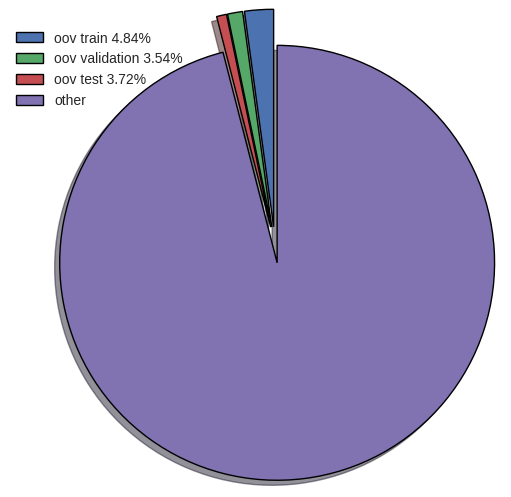

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn')
figure(figsize=(6, 6), dpi=100)
explode_=(0.1, 0.1, 0.1, 0.1)
total=len(w2i_val)+len(w2i_train)+len(w2i_test)
y=np.array([len(oov1), len(oov2), len(oov3), total])
mylabels=['oov train {}%'.format(round(percentage_oov1, 2)), 'oov validation {}%'.format(round(percentage_oov2, 2)), 'oov test {}2%'.format(round(percentage_oov3, 2)), 'other' ]
patches, texts=plt.pie(y, startangle=90,radius=1.2, wedgeprops={'edgecolor': 'black', 'linewidth':1}, explode=explode_, shadow=True)
plt.legend(patches, mylabels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.show();

In [34]:
df_train.drop('split',axis=1)
df_val.drop('split',axis=1)
df_test.drop('split',axis=1)

,tokens,tags
1958,"[2506, 1157, 1163, 1170, 18, 22, 2088, 49, 82,...","[5, 5, 16, 5, 32, 20, 32, 31, 38, 11, 2, 6, 5,..."
1959,"[16859, 148, 1020, 295, 2985, 1479, 1464, 12, ...","[5, 5, 5, 32, 11, 2, 12, 6, 9, 11, 2, 32, 5, 2..."
1960,"[7620, 953, 1020, 18, 22, 613, 470, 15, 203, 5...","[5, 5, 5, 32, 20, 32, 12, 6, 11, 6, 31, 11, 2,..."
1961,"[87, 3193, 3083, 470, 6494, 15, 5879, 14, 1344...","[2, 2, 12, 12, 32, 6, 12, 6, 5, 24, 9, 11, 2, ..."
1962,"[2, 3794, 5, 115381, 3, 51, 3273, 6, 598, 9, 7...","[9, 2, 6, 5, 24, 6, 23, 4, 14, 9, 2, 6, 9, 2, ..."
1963,"[2065, 6711, 1170, 18, 14, 73138, 785, 821, 13...","[5, 5, 5, 32, 6, 5, 5, 5, 5, 5, 3, 15, 23, 9, ..."
1964,"[10853, 4170, 5784, 18, 787, 400576, 3142, 21,...","[5, 5, 5, 32, 5, 5, 32, 6, 11, 2, 4, 14, 11, 1..."
1965,"[38582, 4076, 1020, 3, 9, 2885, 5, 400580, 776...","[5, 5, 5, 24, 9, 2, 6, 5, 5, 5, 10, 5, 5, 5, 1..."
1966,"[102798, 1020, 295, 9, 210377, 1052, 868, 5, 8...","[5, 5, 32, 9, 2, 11, 2, 6, 38, 28, 28, 24, 16,..."
1967,"[400584, 1020, 18, 22, 2872, 6, 257, 9, 210377...","[5, 5, 32, 20, 3, 4, 14, 9, 2, 11, 2, 6, 38, 2..."


#Create a baseline model, using a simple neural architecture

In [35]:
import  tensorflow as tf
from sklearn.metrics import f1_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LayerNormalization, LSTM, Dense, Bidirectional, GRU, Embedding)

# base class model
class RNN(tf.keras.Model):
    def __init__(self, tag_vocab_size, sequence_len, embedding_matrix, batch_size):
        super(RNN, self).__init__()
        word_voc = embedding_matrix.shape[0]
        embedding_dim = embedding_matrix.shape[1]

        # input and embedding layers are shared among all the models
        self.input_layer = Input(batch_input_shape=(batch_size, sequence_len))
        self.embedding_layer = Embedding(word_voc, embedding_dim,weights=[embedding_matrix], trainable=False,mask_zero=True)


    def build(self):
        return Model(inputs=[self.input_layer], outputs=self(self.input_layer))

    def copy_weights(self, model):
        assert type(model).__name__ == type(self).__name__
        for layer, model_layer in zip(self.layers[1:], model.layers[1:]):
            layer.set_weights(model_layer.get_weights())

    def loss_function(self, y_true, predictions):
        mask = tf.math.logical_not(tf.math.equal(y, p2i[PAD])) # pad mask
        sce = tf.keras.losses.sparse_categorical_crossentropy(y_true, predictions, from_logits=False)
        mask = tf.cast(mask, dtype=sce.dtype)
        sce *= mask
        return tf.reduce_sum(sce)/tf.reduce_sum(mask)

    def update_metrics(self, y_true, predictions, loss_obj, acc_obj, f1_obj):

        # loss
        current_loss = self.loss_function(y_true, predictions)
        loss_obj.update_state(current_loss)

        p1 = tf.math.logical_or(tf.math.equal(y_true, p2i[PAD]),tf.math.equal(y, p2i['.']))
        p2 = tf.math.logical_or(tf.math.equal(y_true, p2i[',']),tf.math.equal(y, p2i[':']))
        punctuation = tf.math.logical_or(p1, p2)
        punctuation = tf.math.equal(y, p2i[PAD])
        sample_weights = tf.math.logical_not(punctuation)
        pred_np = np.argmax(predictions, axis=2)

        # accuracy
        acc_obj.update_state(y_true, pred_np, sample_weight=sample_weights)

        # f1 macro
        y_true_np = y.numpy().astype(np.int32)
        f1 = f1_score(y_true_np.flatten(), pred_np.flatten(), sample_weight=tf.reshape(sample_weights,[-1]),average='macro', zero_division=0, labels=[*p2i.values()])
        f1_obj.update_state(f1) 

##BiLSTM

In [36]:
# bidirectional lstm + dense

class BiLSTM(RNN):
    def __init__(self, tag_vocab_size, sequence_len, embedding_matrix, batch_size, lstm_dim):
        super(BiLSTM, self).__init__(tag_vocab_size, sequence_len, embedding_matrix, batch_size)
        self.lstm = Bidirectional(LSTM(lstm_dim, return_state=True, return_sequences=True))
        self.fc = Dense(tag_vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm(embedded)
        output = self.fc(lstm_o)
        return output

##GRU

In [37]:
#GRU Model
class GRU(RNN):
    def __init__(self, tag_vocab_size, 
                 sequence_len, embedding_matrix, batch_size, gru_dim):
        super(GRU, self).__init__(tag_vocab_size, sequence_len, embedding_matrix, batch_size)
        self.gru = tf.keras.layers.GRU(gru_dim, return_state=True, return_sequences=True)
        #self.gru = GRU(gru_dim)
        self.fc = Dense(tag_vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        gru_o, gru_s = self.gru(embedded)
        output = self.fc(gru_o)
        return output

##BiGRU

In [38]:
#BiGRU

# bidirectional lstm + dense ###################################################
class BiGRU(RNN):
    def __init__(self, tag_vocab_size, 
                 sequence_len, embedding_matrix, batch_size, gru_dim):
        super(BiGRU, self).__init__(tag_vocab_size, sequence_len, embedding_matrix, batch_size)
        #self.gru = Bidirectional(GRU(gru_dim))
        self.gru = Bidirectional(tf.keras.layers.GRU(gru_dim, return_state=True, return_sequences=True))
        self.fc = Dense(tag_vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        gru_o, gru_sf, gru_sb = self.gru(embedded)
        output = self.fc(gru_o)
        return output

##BiLSTM-BiLSTM

In [39]:
# bidirectional lstm + bidirectional lstm ######################################
class BiLSTM_BiLSTM(RNN): 
    def __init__(self, tag_vocab_size, sequence_len, embedding_matrix, batch_size, lstm_dim):
        super(BiLSTM_BiLSTM, self).__init__(tag_vocab_size, sequence_len, embedding_matrix, batch_size)
        self.lstm1 = Bidirectional(LSTM(
            lstm_dim, return_state=True, return_sequences=True))
        self.lstm2 = Bidirectional(LSTM(
            lstm_dim, return_state=True, return_sequences=True))
        self.fc = Dense(tag_vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm1(embedded)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm2(lstm_o)
        output = self.fc(lstm_o)
        return output

#DataIterator

In [40]:
# helper class to iterate the data
class DataIterator:
    def __init__(self, df, sequence_len, batch_size):

        #converting the tokens and tags to numpy
        self.X = df['tokens'].to_numpy()
        self.Y = df['tags'].to_numpy()

        #checking if the length of tokens and tags are equal
        assert self.X.shape[0] == self.Y.shape[0]
        self.num_sentence = self.X.shape[0]
        self.batch_size = batch_size


        # pad sentences
        self.data_list = []
        for i in range(self.num_sentence):
            m = np.zeros((sequence_len))
            n = np.zeros(sequence_len) + p2i[PAD]
            l = min(len(self.X[i]), sequence_len)
            m[:l] = self.X[i][:l]
            n[:l] = self.Y[i][:l]
            self.data_list.append((m, n))
        self.shuffle()


    def shuffle(self):
        self.current = 0
        random.shuffle(self.data_list)
        # batch the data
        num_batches = math.ceil(self.num_sentence/self.batch_size)
        self.batches_x = []
        self.batches_y = []
        for i in range(num_batches):
            batchx = []
            batchy = []
            for j in range(self.batch_size):
                if i*batch_size+j >= self.num_sentence:
                    break
                batchx.append(self.data_list[i*self.batch_size+j][0])
                batchy.append(self.data_list[i*self.batch_size+j][1])
            self.batches_x.append(np.array(batchx))
            self.batches_y.append(np.array(batchy))



    def __iter__(self):
        return self

    def __next__(self):
        if self.current >= len(self.batches_x):
            raise StopIteration
        x = self.batches_x[self.current]
        y = self.batches_y[self.current]
        x = tf.cast(x, tf.float32)
        y = tf.cast(y, tf.float32)
        self.current += 1
        return x,y



#Train step graph

In [41]:
def train_step_graph_fn(optimizer, model, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = model.loss_function(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return predictions

def val_step_graph_fn(model, x):
    predictions = model(x)
    return predictions   



#Hyperparameters

In [97]:
# hyperparameters
sequence_len = 128
batch_size =   64#@param {type:"integer"}
max_epochs = 100 #@param {type:"integer"}
learning_rate = 5e-3 #@param {type:"number"}
latent_dim =   64#@param {type:"integer"}
RNNModel = BiGRU #@param ['BiLSTM', 'GRU', 'BiGRU', 'BiLSTM_BiLSTM'] {type:"raw"}


#Confusion Matrix Function

In [98]:
# Plot confusion matrix on all test set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusion_matrix_function(y_acc,pred_acc):
  cm = confusion_matrix(y_acc, pred_acc)[1:,1:]
  cm = cm.astype('int')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[i2p[y] for y in list(set(y_acc))][1:]) 

  fig = plt.figure(figsize=(25,25))
  ax = fig.add_subplot(111)
  disp.plot(include_values=True, ax=ax,values_format='.10g', cmap='inferno');
  plt.show()

#Training, Validation of the model

In [99]:
pos_vocab_size = len(p2i.keys())
# train model
model = RNNModel(pos_vocab_size, sequence_len, embedding_matrix_v2, batch_size, latent_dim)
model.build()
# val model
val_model = RNNModel(pos_vocab_size, sequence_len, embedding_matrix_v3, batch_size, latent_dim)
val_model.build()
# best model
best_model = RNNModel(pos_vocab_size, sequence_len, embedding_matrix_v3, batch_size, latent_dim)
best_model.build()

In [100]:
# metrics
import random 
import math


train_loss_obj = tf.keras.metrics.Mean(name='train_loss')
train_f1_obj = tf.keras.metrics.Mean(name='train_f1')
train_acc_obj = tf.keras.metrics.Accuracy(name='train_accuracy')
val_loss_obj = tf.keras.metrics.Mean(name='val_loss')
val_f1_obj = tf.keras.metrics.Mean(name='val_f1')
val_acc_obj = tf.keras.metrics.Accuracy(name='val_accuracy')
# optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_data = DataIterator(df_train, sequence_len, batch_size)
val_data = DataIterator(df_val, sequence_len, batch_size)
#lists
train_loss_list=[]
train_acc_list=[]
train_f1_list=[]

val_loss_list=[]
val_acc_list=[]
val_f1_list=[]

ep=[]
ep_val=[]
# train loop
max_val_loss = math.inf
not_improving = 0
max_iter_not_improv = 2

errors = []
#ep=[]
for epoch in range(max_epochs):
    train_loss_obj.reset_states()
    train_f1_obj.reset_states()
    train_acc_obj.reset_states()

    train_data.shuffle()
    errors = errors[:-10]
   
    for x,y in train_data:
        predictions = train_step_graph_fn(optimizer, model, x, y)
        errors.append((x[np.argmax(predictions, axis = -1) != y], y, predictions))
        model.update_metrics(y, predictions, train_loss_obj, train_acc_obj, train_f1_obj)
    train_loss_list.append(train_loss_obj.result())
    train_acc_list.append(train_acc_obj.result())
    train_f1_list.append(train_f1_obj.result())

    ep.append(epoch)
    #plt.plot(epoch, train_loss_list)
    print("{}.  \t[TRAINING]\t  loss= {}  \t accuracy= {} \t f1-macro= {}".format(epoch, round(float(train_loss_obj.result().numpy()), 3),
                                                                                  round(float(train_acc_obj.result().numpy()), 3),
                                                                                  round(float(train_f1_obj.result().numpy()), 3)))
    # validation
    if epoch%5 == 4:
        val_loss_obj.reset_states()
        val_acc_obj.reset_states()
        val_f1_obj.reset_states()

        val_model.copy_weights(model)
        val_data.shuffle()
        
        for x,y in val_data:
            predictions = val_step_graph_fn(val_model, x)
            val_model.update_metrics(y, predictions, val_loss_obj, val_acc_obj, val_f1_obj)
        val_loss_list.append(train_loss_obj.result())
        val_acc_list.append(train_acc_obj.result())
        val_f1_list.append(train_f1_obj.result())
        ep_val.append(epoch)
        
        print("     \t[VALIDATION]\t   loss= {}  \t  accuracy= {} \t  f1-macro= {}".format(round(float(val_loss_obj.result().numpy()), 3),
                                                                                           round(float(val_acc_obj.result().numpy()), 3),
                                                                                           round(float(val_f1_obj.result().numpy()), 3)))
        
        # early stopping
        if val_loss_obj.result() < max_val_loss:
            best_model.copy_weights(val_model)
            max_val_loss = val_loss_obj.result()
            not_improving = 0
        else:
            not_improving += 1
            print("VALIDATION LOSS NOT IMPROVING, STRIKE:", not_improving,"!!")
            if not_improving >= max_iter_not_improv:
                print("Validation loss not improving for", max_iter_not_improv,
                      "successive computations.")
                break


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.7/dist-packages/keras/backend.py", line 4616, in <genexpr>
    for ta, out in zip(output_ta_t, flat_new_output))  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/tf_should_use.py", line 249, in wrapped
    error_in_function=error_in_function)
0.  	[TRAINING]	  loss= 1.789  	 accuracy= 0.552 	 f1-macro= 0.236
1.  	[TRAINING]	  loss= 0.612  	 accuracy= 0.835 	 f1-macro= 0.513
2.  	[TRAINING]	  loss= 0.411  	 accuracy= 0.888 	 f1-macro= 0.595
3.  	[TRAINING]	  loss= 0.328  	 accuracy= 0.908 	 f1-macro= 0.63
4.  	[TRAINING]	  loss= 0.274  	 accuracy= 0.923 	 f1-macro= 0.657
     	[VALIDATION]	   loss= 8.52  	  accuracy= 0.112 	  f1-macro= 0.046
5.  	[TRAINING]	  loss= 0.236  	 accuracy= 0.934 	 f1-macro= 0.

In [101]:
pip install mpld3

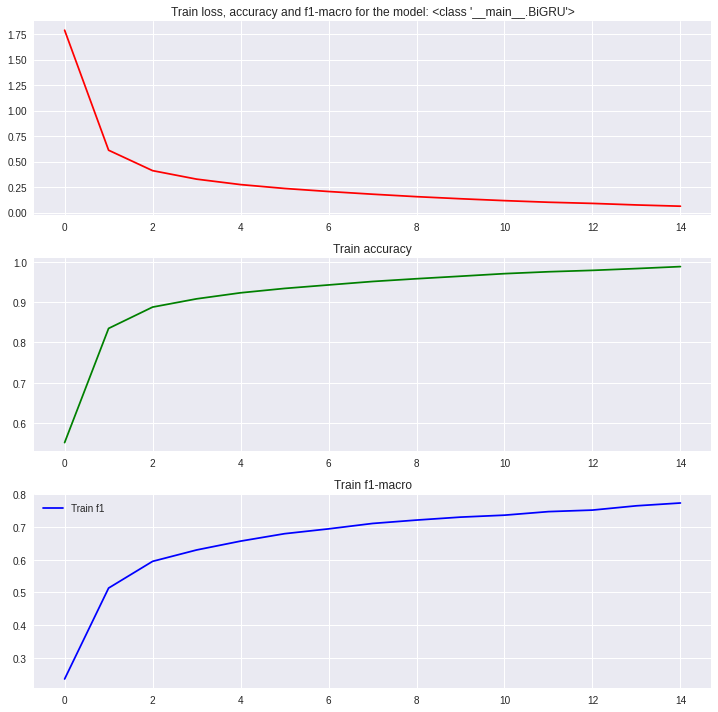

In [102]:
%matplotlib inline
import mpld3
import matplotlib
mpld3.enable_notebook()
#matplotlib.use('nbagg')
fig, axs=plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(ep, train_loss_list, label='Train loss', color='r')
axs[0].set_title('Train Loss')
axs[1].plot(ep, train_acc_list, label='Train Acc', color='g')
axs[1].set_title('Train accuracy')

axs[2].plot(ep, train_f1_list, label='Train f1', color='b')
axs[2].set_title('Train f1-macro')

plt.legend()
fig.tight_layout()
axs[0].set_title('Train loss, accuracy and f1-macro for the model: {}'.format(RNNModel))
plt.show()

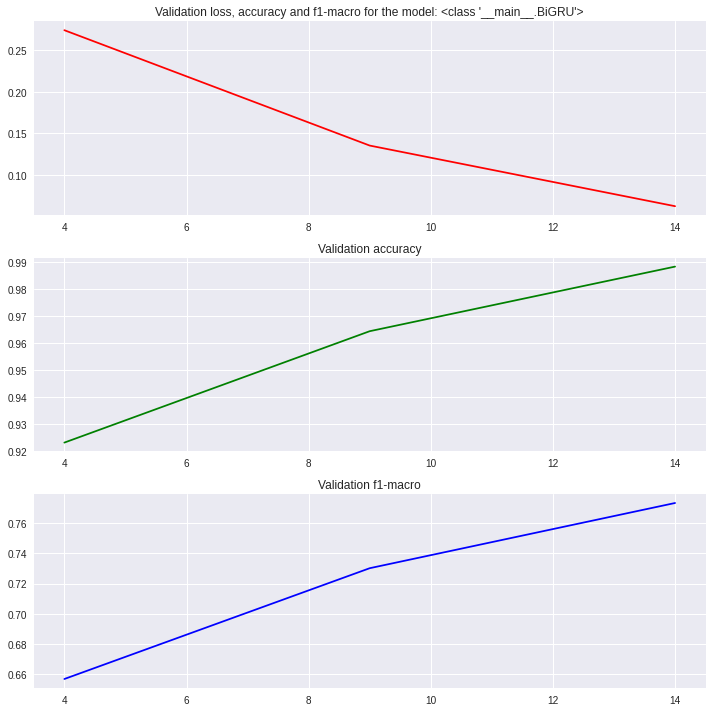

In [103]:
%matplotlib inline
import mpld3
import matplotlib
mpld3.enable_notebook()

fig, axs=plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(ep_val, val_loss_list, label='Validation loss', color='r')
axs[1].plot(ep_val, val_acc_list, label='Validation Acc', color='g')
axs[2].plot(ep_val, val_f1_list, label='Validation f1-macro', color='b')
axs[0].set_title('Validation loss')
axs[1].set_title('Validation accuracy')
axs[2].set_title('Validation f1-macro')

fig.tight_layout()

axs[0].set_title('Validation loss, accuracy and f1-macro for the model: {}'.format(RNNModel))

plt.show()

#Test of the model


[TEST] loss=8.4299 	 accuracy= 0.1028 	 f1-macro= 0.0448


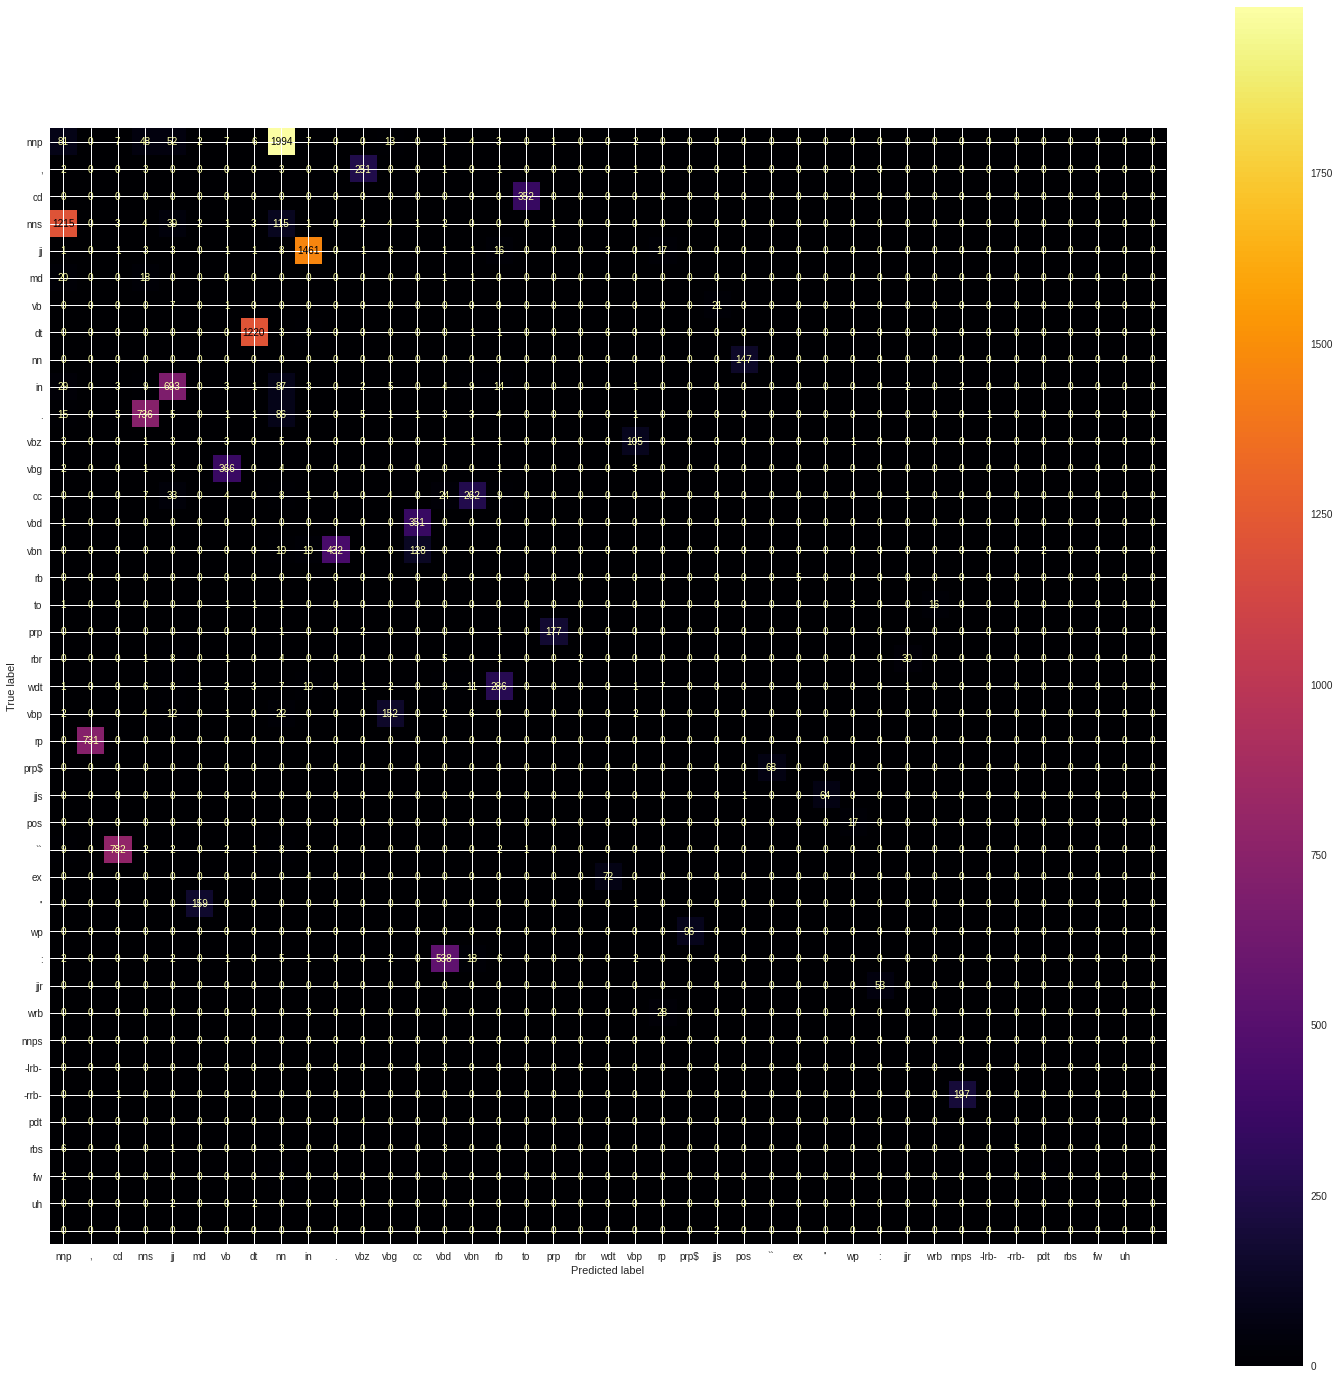

In [104]:

test_seq_len = 1000 # max document length
test_model = RNNModel(pos_vocab_size, test_seq_len, embedding_matrix_v4, 
                      batch_size, latent_dim)
test_model.build()
test_model.copy_weights(best_model)
#test_data.shuffle()
# run on the test set
test_loss_obj = tf.keras.metrics.Mean(name='test_loss')
test_f1_obj = tf.keras.metrics.Mean(name='test_f1')
test_acc_obj = tf.keras.metrics.Accuracy(name='test_accuracy')

test_data = DataIterator(df_test, test_seq_len, batch_size)
test_data.shuffle()
y_acc, pred_acc = [], []

for x, y in test_data:
    predictions = val_step_graph_fn(test_model, x)
    test_model.update_metrics(y, predictions, test_loss_obj, test_acc_obj, test_f1_obj)
    y_acc += list(y.numpy().flatten())

    pred_acc += list(np.argmax(predictions, axis=2).flatten())
    test_loss=test_loss_obj.result().numpy()
    test_acc=test_acc_obj.result().numpy()
    test_f1=test_f1_obj.result().numpy()
print("\n[TEST] loss={} \t accuracy= {} \t f1-macro= {}".format(
                                                round(float(test_loss), 4),
                                                round(float(test_acc), 4),
                                                round(float(test_f1), 4)))

confusion_matrix_function(y_acc, pred_acc)


#Report

In [ ]:
#df_report = df_report.iloc[0:0] If we want to clean out the df_report


In [ ]:
df_report=pd.DataFrame(columns=["Model_Name", "Loss", "Accuracy", "F1_macro"])



In [107]:
if RNNModel is BiLSTM:
  #myTable.clear
  if 'BiLSTM' not in df_report.values:
    new_row=pd.Series(data={'Model_Name': 'BiLSTM', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1-macro':test_f1 }, name='x')
    df_report=df_report.append(new_row, ignore_index=False)
  else:
    df_report=df_report.drop(df_report[df_report['Model_Name'] =='BiLSTM'].index, axis=0)
    new_row=pd.Series(data={'Model_Name': 'BiLSTM', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1-macro':test_f1 }, name='x')
    df_report=df_report.append(new_row, ignore_index=False)

elif RNNModel is GRU :
  if 'GRU' not in df_report.values:
    new_row=pd.Series(data={'Model_Name': 'GRU', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1_macro':test_f1 }, name='x')
    df_report=df_report.append(new_row, ignore_index=False)
  else:
    df_report=df_report.drop(df_report[df_report['Model_Name'] =='GRU'].index, axis=0)
    new_row=pd.Series(data={'Model_Name': 'GRU', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1_macro':test_f1 }, name='x')
    df_report=df_report.append(new_row, ignore_index=False)
elif RNNModel is BiGRU :
  if 'BiGRU' not in df_report.values:
    new_row=pd.Series(data={'Model_Name': 'BiGRU', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1_macro':test_f1}, name='x')
    df_report=df_report.append(new_row, ignore_index=False)
  else:
    df_report=df_report.drop(df_report[df_report['Model_Name'] =='BiGRU'].index, axis=0)
    new_row=pd.Series(data={'Model_Name': 'BiGRU', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1_macro':test_f1}, name='x')
    df_report=df_report.append(new_row, ignore_index=False)


elif RNNModel is BiLSTM_BiLSTM:
  if 'BiLSTM_BiLSTM' not in df_report.values:
    new_row=pd.Series(data={'Model_Name': 'BiLSTM-BiLSTM', 'Loss':test_loss,
                            'Accuracy':test_acc, 'F1_macro':test_f1}, name='x')
    df_report=df_report.append(new_row, ignore_index=False)
  else:
    df_report=df_report.drop(df_report[df_report['Model_Name'] =='BiLSTM_BiLSTM'].index, axis=0)




print(df_report)

  Model_Name      Loss  Accuracy  F1_macro
x      BiGRU  8.429934  0.102838  0.044782
